In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from toolbox.calculator.elecpot import ElecPotentialCalculator
from toolbox.utils.unit import EPSILON

In [3]:
l_box = 10.0  # Box length
dx = 0.01  # Grid spacing
grid_volume = 10.0 * 10.0 * dx

grids = np.arange(0., l_box, dx)
charge = np.zeros_like(grids)
charge[100] = 1.0
charge[-100] = -1.0
# charge density [e/A^3]
rho = charge / grid_volume

In [4]:
calculator = ElecPotentialCalculator(rho, grids)
phi = calculator.calculate(l_box=l_box)

| | FFT took 0.00038800000000005497 s
| | k-space arithmetics took 0.0013090000000000046 s
| | Inverse FFT took 0.0002580000000000915 s


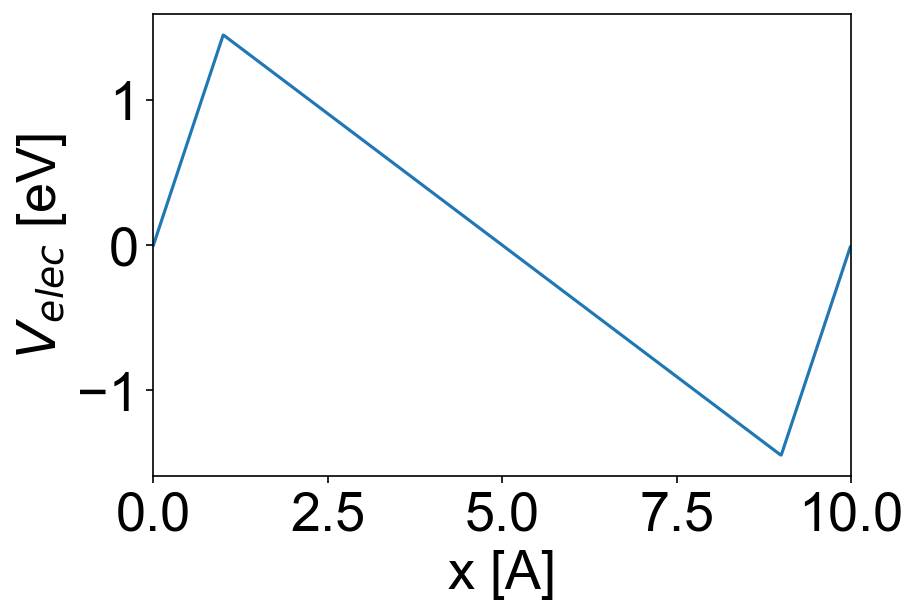

In [5]:
plt.plot(grids, phi)
plt.xlabel("x [A]")
plt.ylabel(r"$V_{elec}$ [eV]")

plt.xlim(0., l_box)
plt.show()

There is a dipole moment of 2 eA in the system. Consider the relationship:

$$
D=E+\varepsilon_0P
$$

and $E=0$ under periodic boundary condition, we would expect the D-field (i.e., E-field in vaccum) should be equal to the polarization field:

$$
D=\varepsilon_0P.
$$

In [6]:
dipole = 2.0 
pfield = dipole / l_box ** 3 / EPSILON
print("The D-field from dipole moment is: %.5f [V/A]" % pfield)
lsq_out = stats.linregress(grids[200:300], phi[200:300])
print("The D-field from electrostatic profile is: %.5f [V/A]" % -lsq_out.slope)

The D-field from dipole moment is: 0.36190 [V/A]
The D-field from electrostatic profile is: 0.36190 [V/A]
